In [1]:
#Use python38 kernel

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


In [3]:
import autoreload

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import brightway2 as bw
import lca_algebraic as agb
from IPython.display import display
import database_explorer as dbex

In [5]:
bw.projects.set_current('Ecoinvent 3.8')

In [6]:
#Setting brightway environment
bw.projects.set_current('Ecoinvent 3.8')
eidb = bw.Database('ecoinvent 3.8 cut-off')
biodb = bw.Database('biosphere3')

In [7]:
#Choix des catégories d'impacts
methods_EF = [m for m in bw.methods if 'EF v3.0 EN15804' in str(m) 
              and not 'no LT' in str(m) and not 'obsolete' in str(m) ]
methods_CC = [m for m in methods_EF if 'climate' in str(m)]
#Récupération des unités
EF_methods_unit = [bw.Method(m).metadata['unit'] for m in methods_EF]

In [8]:
#Search for bioenergy related datasets in eidb
[act for act in eidb if 'bio' in act['name'] 
 and not 'biogas' in act['name']
 and not 'biomethane' in act['name']
 and not 'biomass' in act['name']
 and not 'biowaste' in act['name']
 and not 'bioethanol' in act['name']
 and not 'biofuel' in act['name']]

['tap water production, conventional with biological treatment' (kilogram, CH, None),
 'polyester-complexed starch biopolymer production' (kilogram, RER, None),
 'tap water production, conventional with biological treatment' (kilogram, RoW, None),
 'tap water production, conventional with biological treatment' (kilogram, Europe without Switzerland, None),
 'tap water production, conventional with biological treatment' (kilogram, CO, None),
 'market for polyester-complexed starch biopolymer' (kilogram, GLO, None),
 'polyester-complexed starch biopolymer production' (kilogram, RoW, None),
 'tap water production, conventional with biological treatment' (kilogram, CA-QC, None)]

In [9]:
list_act = dbex.list_act(database = eidb,
                         name = 'biomethane',
                         unit = 'cubic meter')
list_act.explore(strict = False, comments = False)

List of names:


{'biogas purification to biomethane by amino washing',
 'biogas purification to biomethane by membrane technique',
 'biogas purification to biomethane by pressure swing adsorption',
 'biomethane production, high pressure from synthetic gas, wood, fixed bed technology',
 'biomethane production, high pressure from synthetic gas, wood, fluidised technology',
 'market for biomethane, high pressure',
 'market for mixed natural gas and biomethane, high pressure',
 'mixed natural gas and biomethane production, high pressure'}

List of locations:


{'CH', 'RoW'}

List of units:


{'cubic meter'}

biogas purification to biomethane by membrane technique[CH] (1.000000 cubic meter)  \
                                                                                                                     input   
Acetaldehyde                                                                           NaN                                   
Acetic acid                                                                            NaN                                   
Benzene                                                                                NaN                                   
Benzo(a)pyrene                                                                         NaN                                   
Butane                                                                                 NaN                                   
...                                                                                    ...                                   
wood chips, wet, measured as dry mass                                                  NaN                                   
wood chips, wet, measured as dry mass#1                                                NaN                                   
wood chips, wet, measured as dry mass#2                                                NaN                                   
zeolite, powder                                                                        NaN                                   
zinc                                                                                   NaN                                   

                                                     \
                                        amount unit   
Acetaldehyde                               NaN  NaN   
Acetic acid                                NaN  NaN   
Benzene                                    NaN  NaN   
Benzo(a)pyrene                             NaN  NaN   
Butane                                     NaN  NaN   
...                                        ...  ...   
wood chips, wet, measured as dry mass      NaN  NaN   
wood chips, wet, measured as dry mass#1    NaN  NaN   
wood chips, wet, measured as dry mass#2    NaN  NaN   
zeolite, powder                            NaN  NaN   
zinc                                       NaN  NaN   

                                        biomethane production, high pressure from synthetic gas, wood, fluidised technology[CH] (1.000000 cubic meter)  \
                                                                                                                                                 input   
Acetaldehyde                                                                  Acetaldehyde                                                               
Acetic acid                                                                    Acetic acid                                                               
Benzene                                                                            Benzene                                                               
Benzo(a)pyrene                                                              Benzo(a)pyrene                                                               
Butane                                                                              Butane                                                               
...                                                                                    ...                                                               
wood chips, wet, measured as dry mass    market for wood chips, wet, measured as dry ma...                                                               
wood chips, wet, measured as dry mass#1                                                NaN                                                               
wood chips, wet, measured as dry mass#2                                                NaN                                                       

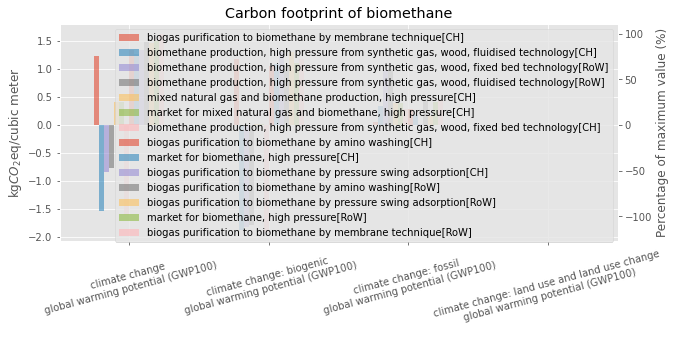

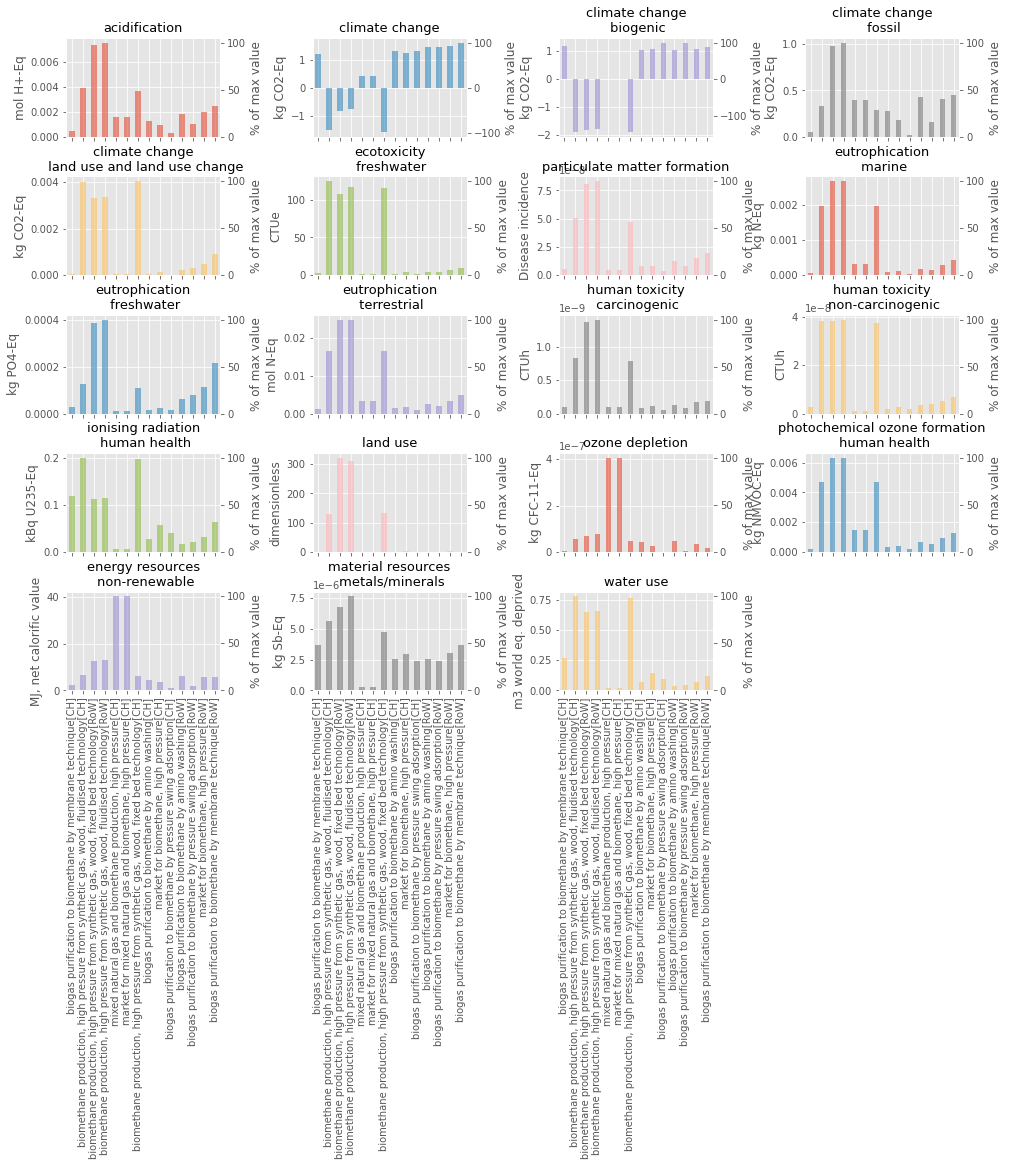

In [10]:
list_act.analyse(methods_CC, methods_EF, print_mode = 0)

'biomethane production, high pressure from synthetic gas, wood, fluidised technology' (cubic meter, CH, None)
('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')
('EF v3.0 EN15804', 'climate change: biogenic', 'global warming potential (GWP100)')
('EF v3.0 EN15804', 'climate change: fossil', 'global warming potential (GWP100)')
('EF v3.0 EN15804', 'climate change: land use and land use change', 'global warming potential (GWP100)')


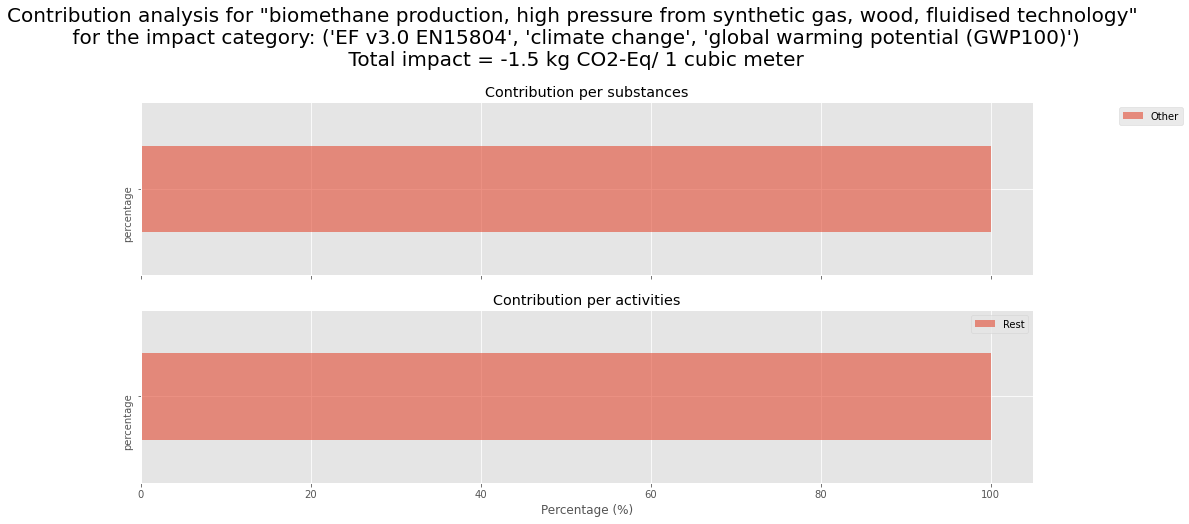

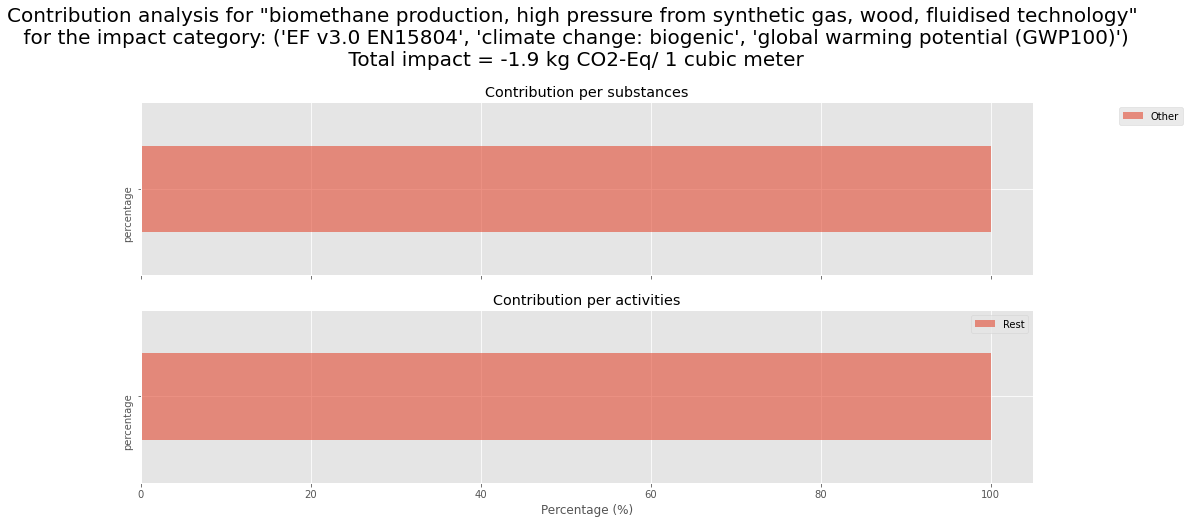

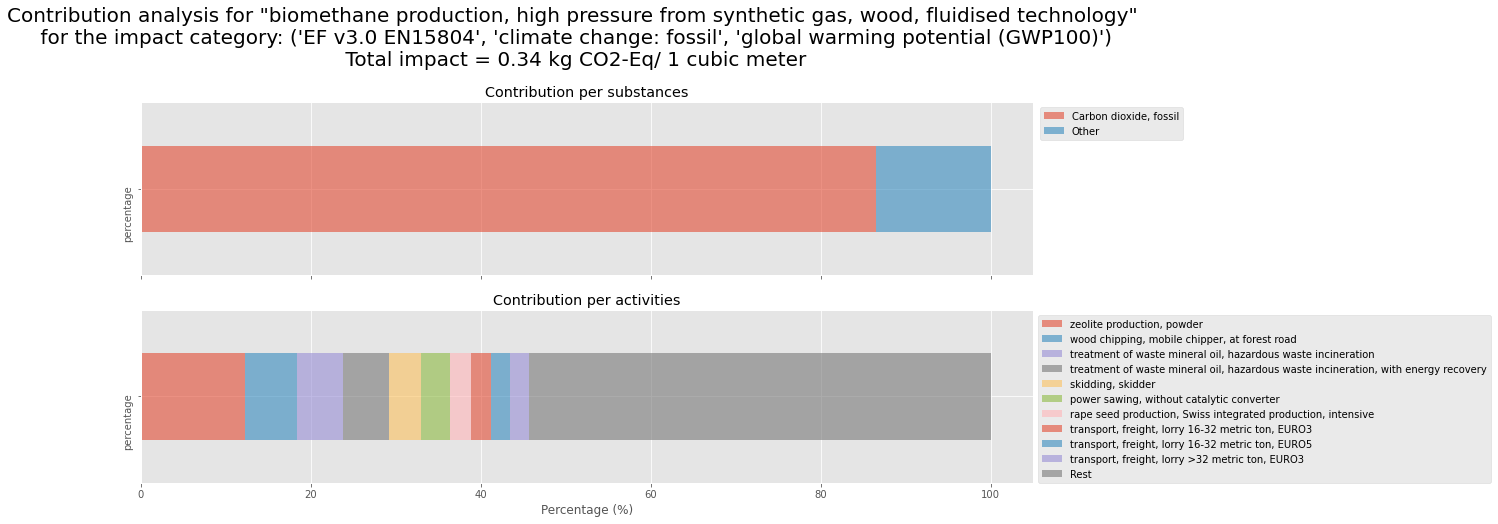

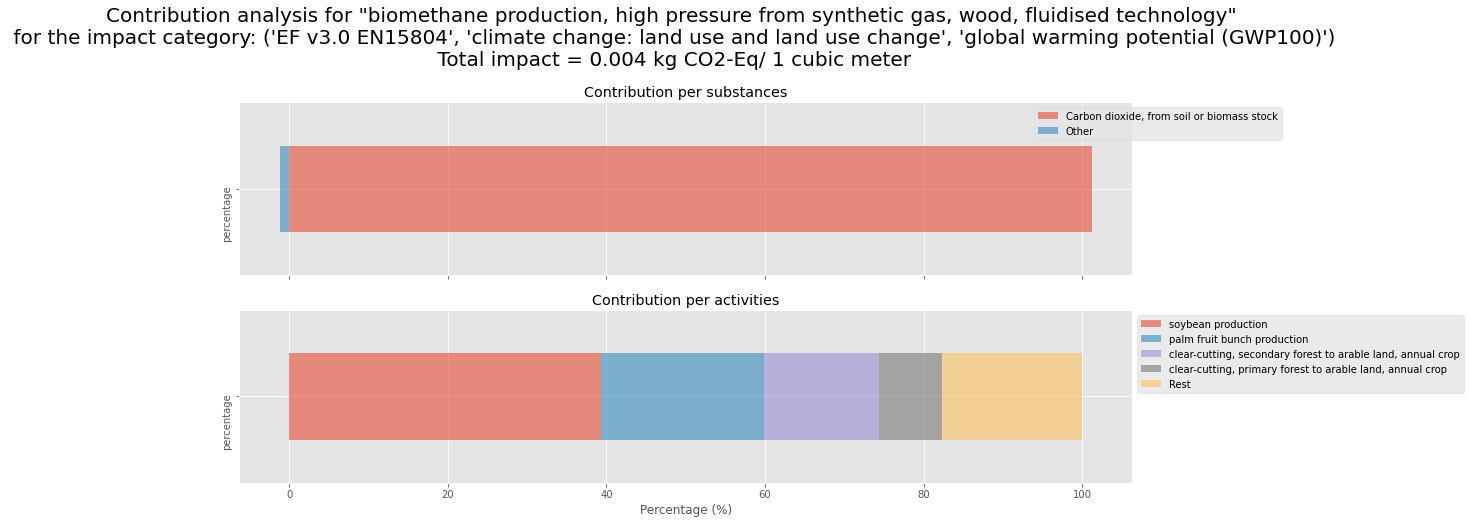

In [11]:
list_act.contribution_analysis(i = 1,
                               methods = methods_CC,
                               save = True) 

In [21]:
fig = list_act.plot_sunburst(i = 4, method = methods_CC[0], cutoff = 0.02, amount = 1)
fig

In [22]:
for i, act in enumerate(list_act.list_act):
    print(act['name'])
    fig = list_act.plot_sunburst(i = i, method = methods_CC[0], cutoff = 0.02, amount = 1)
    fig.show()

biogas purification to biomethane by membrane technique


biomethane production, high pressure from synthetic gas, wood, fluidised technology


biomethane production, high pressure from synthetic gas, wood, fixed bed technology


biomethane production, high pressure from synthetic gas, wood, fluidised technology


mixed natural gas and biomethane production, high pressure


market for mixed natural gas and biomethane, high pressure


biomethane production, high pressure from synthetic gas, wood, fixed bed technology


biogas purification to biomethane by amino washing


market for biomethane, high pressure


biogas purification to biomethane by pressure swing adsorption


biogas purification to biomethane by amino washing


biogas purification to biomethane by pressure swing adsorption


market for biomethane, high pressure


biogas purification to biomethane by membrane technique


# Sunburst

In [23]:
from bw2calc import GraphTraversal
import plotly.express as px
import math

In [28]:
def plot_sunburst(act, method, cutoff, amount=1):
    #act = self.list_act[i]
    lca = bw.LCA({act: amount}, method)
    lca.lci()
    lca.lcia()
    impact = lca.score
    unit = bw.Method(method).metadata["unit"]

    gt = GraphTraversal().calculate({act: amount}, method=method, cutoff=cutoff)

    # Label
    acts = gt["lca"].activity_dict
    id_to_key = {v: k for k, v in acts.items()}

    ids = list(gt["nodes"].keys())
    labels = [bw.get_activity(id_to_key[id])["name"] for id in ids[1:]]
    labels_loc = [bw.get_activity(id_to_key[id])["location"] for id in ids[1:]]
    labels = [
        label + " " + label_loc for label, label_loc in zip(labels, labels_loc)
    ]
    # Source
    edges = gt["edges"]
    edges = edges[: len(labels)]
    ids_source = [edge["to"] for edge in edges]
    ids_source = [
        bw.get_activity(id_to_key[id])["name"]
        + " "
        + bw.get_activity(id_to_key[id])["location"]
        for id in ids_source[1:]
    ]
    ids_source = [""] + ids_source
    #Value
    value = [edge["impact"] for edge in edges]
    #Data dictionary
    data = dict(label = labels,
                location = labels_loc,
                parent = ids_source,
                value = value)
    df = pd.DataFrame.from_dict(data)
    #Percentage data
    df['value_pct'] = df.value/impact * 100
    #Flooring percentage value to avoid sum of childs slightly higher than parents, and calculating value from floored pct
    df.value_pct = (df.value_pct*10).apply(math.floor)/10
    df.value = df.value_pct/100 * impact
    df.value = df.value.apply(lambda x:round(x,3))

    #Filtering negative value
    list_label_negatif = list(df[df.value <=0].label.unique())

    def is_parent_or_child_negative(row):
        if (row.label in list_label_negatif) or (row.parent in list_label_negatif):
            is_negative = True
        else:
            is_negative = False
        return is_negative

    df['is_negative'] = df.apply(is_parent_or_child_negative, axis = 1)
    df_p = df[df.is_negative == False]
    df_n = df[df.is_negative == True]

    data_p = df_p.to_dict()
    data_n = df_n.to_dict()

    #Sunburst for positive value
    fig = px.sunburst(
        data_p,
        names="label",
        parents="parent",
        values="value",
        branchvalues="total",
        color="value_pct",
        color_continuous_scale="algae",
        hover_data=["location"],
        # valueformat = '.0f',
    )
    fig.update_traces(textinfo="percent parent")
    # fig.update_layout(uniformtext = dict(minsize=8, mode='hide'))

    title = f"{act['name'].capitalize()}: {impact:.2g} {unit}/{amount:2g}{act['unit']}\n <br> Method: {str(method)}"
    fig.update_layout(autosize=True, title_text=title, title_x=0.5, font_size=10)
    # fig.show()
    return fig, df

In [29]:
act = list_act.list_act[1]
print(act)
fig, df = plot_sunburst(act = act, method = methods_CC[0], cutoff = 0.02, amount=1)

'biomethane production, high pressure from synthetic gas, wood, fluidised technology' (cubic meter, CH, None)


In [31]:
df_p = df[df.is_negative == False]
df_n = df[df.is_negative == True]

In [35]:
df_p

,label,location,parent,value,value_pct,is_negative


In [34]:
df_n

,label,location,parent,value,value_pct,is_negative
0,"biomethane production, high pressure from synt...",CH,,-1.528,99.9,True
1,"market for wood chips, dry, measured as dry ma...",RER,"biomethane production, high pressure from synt...",-1.466,95.8,True
2,market for waste mineral oil CH,CH,"biomethane production, high pressure from synt...",0.037,-2.4,True
3,"market for zeolite, powder GLO",GLO,"biomethane production, high pressure from synt...",0.043,-2.8,True
4,"market for electricity, medium voltage CH",CH,"biomethane production, high pressure from synt...",0.047,-3.1,True
5,"market for wood chips, wet, measured as dry ma...",CH,"biomethane production, high pressure from synt...",-5.099,333.3,True
6,"wood chips production, hardwood, at sawmill CH",CH,"market for wood chips, wet, measured as dry ma...",-0.066,4.3,True
7,"wood chips production, softwood, at sawmill CH",CH,"market for wood chips, wet, measured as dry ma...",-0.756,49.4,True
8,"hardwood forestry, mixed species, sustainable ...",CH,"market for wood chips, wet, measured as dry ma...",-3.340,218.3,True
9,"softwood forestry, mixed species, sustainable ...",CH,"market for wood chips, wet, measured as dry ma...",-0.982,64.2,True


In [ ]:
amount = 1
method = methods_CC[0]
cutoff = 0.02

In [ ]:
act = [act for act in eidb if 'market for electricity, medium voltage' == act['name'] and 'FR' == act['location']][0]
print(act)

'market for electricity, medium voltage' (kilowatt hour, FR, None)


In [ ]:
act = list_act.list_act[1]
print(act)

'biogas purification to biomethane by amino washing' (cubic meter, RoW, None)


In [ ]:
lca = bw.LCA({act:amount}, method)
lca.lci()
lca.lcia() 
impact = lca.score
unit = bw.Method(method).metadata['unit']
print(f"{impact:.2g}{unit}/{act['unit']}")

1.5kg CO2-Eq/cubic meter


In [ ]:
gt = GraphTraversal().calculate({act:amount}, 
                                method = method, 
                                cutoff=0.005)

In [ ]:
#Label 
acts = gt["lca"].activity_dict
id_to_key = {v:k for k, v in acts.items()}

ids = list(gt["nodes"].keys())
#print(ids)
labels = [bw.get_activity(id_to_key[id])["name"] for id in ids[1:]]
labels_loc = [bw.get_activity(id_to_key[id])["location"] for id in ids[1:]]
labels = [ label + ' ' + label_loc for label, label_loc in zip(labels, labels_loc)]
#labels = ["root"] + labels
#labels_loc = [act['location']] + labels_loc
#print(labels)

#Source
edges = gt["edges"]
edges = edges[:len(labels)]
ids_source = [edge["to"] for edge in edges]
ids_source = [bw.get_activity(id_to_key[id])["name"] + ' ' + bw.get_activity(id_to_key[id])["location"] for id in ids_source[1:]]
ids_source = [''] + ids_source
#print(ids_source)

#Value
value = [edge["impact"] for edge in edges]

data = dict(label = labels,
            location = labels_loc,
            parent = ids_source,
            value = value)
df = pd.DataFrame.from_dict(data)
df['value_pct'] = df.value/impact * 100

#Flooring pct to avoid sum of childs slightly higher than parents
df.value_pct = (df.value_pct*10).apply(math.floor)/10
df.value = df.value_pct * impact
df.value = df.value.apply(lambda x:round(x,3))
#df.value_pct = df.value_pct.round(decimals=1)

#df_p = df.copy()
#list_label_negatif = df_p[df_p.value < 0]
#df_p[df_p.value <0] = 0
#df_n = df.copy()
#df_n[df_n.value > 0] = 0
#df_n = - df_n
#df_p = df_p.sort_values('value', ascending = False)

data_p = df_p.to_dict()
data_n = df_n.to_dict()

In [ ]:
#Sunburst positif
#df_p = df_p[df_p.value > impact * cutoff]
data_p = df_p.iloc[0:].to_dict()

fig = px.sunburst(
    data_p,
    names='label',
    parents='parent',
    values='value',
    branchvalues="total",
    color='value_pct',
    color_continuous_scale='algae',
    hover_data=['location'],
    #valueformat = '.0f',
)
fig.update_traces(textinfo="percent parent")
#fig.update_layout(uniformtext = dict(minsize=8, mode='hide'))

title = f"{act['name'].capitalize()}: {impact:.2g} {unit}/{amount:2g}{act['unit']}\n <br> Method: {str(method)}"
fig.update_layout(autosize=True, 
                    title_text = title, 
                    title_x=0.5, 
                    font_size = 10)

In [ ]:
df_p.iloc[:19]

,label,location,parent,value,value_pct,to_remove
0,biogas purification to biomethane by amino was...,RoW,,148.586,100.0,False
1,anaerobic digestion of manure RoW,RoW,biogas purification to biomethane by amino was...,4.012,2.7,False
2,"market for chemical factory, organics GLO",GLO,biogas purification to biomethane by amino was...,0.743,0.5,False
3,"market group for electricity, low voltage RNA",RNA,biogas purification to biomethane by amino was...,1.189,0.8,False
4,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,30.906,20.8,False
5,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,5.349,3.6,False
6,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",4.160,2.8,False
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9,False
8,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.606,3.1,False
9,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",4.755,3.2,False


In [ ]:
list_label_negatif = list(df[df.value <=0].label.unique())

In [ ]:
'market for natural gas, low pressure CH' in list_label_negatif

True

In [ ]:
df_p = df.copy()

In [ ]:
def is_parent_or_child_negative(row):
    if (row.label in list_label_negatif) or (row.parent in list_label_negatif):
        print(row.label)
        is_negative = True
    else:
        is_negative = False
    return is_negative

df['is_negative'] = df.apply(is_parent_or_child_negative, axis = 1)
df_p = df[df.is_negative == False]
df_p

market for natural gas, low pressure CH
market for heat, central or small-scale, other than natural gas RoW
market for natural gas, high pressure CH
electricity voltage transformation from medium to low voltage CN-SGCC
electricity voltage transformation from high to medium voltage CN-SGCC
market for electricity, high voltage CN-SGCC
natural gas production RU
natural gas, burned in gas turbine, for compressor station RU
heat production, anthracite, at stove 5-15kW RoW
market for hard coal CN


,label,location,parent,value,value_pct,to_remove
0,biogas purification to biomethane by amino was...,RoW,,148.586,100.0,False
1,anaerobic digestion of manure RoW,RoW,biogas purification to biomethane by amino was...,4.012,2.7,False
2,"market for chemical factory, organics GLO",GLO,biogas purification to biomethane by amino was...,0.743,0.5,False
3,"market group for electricity, low voltage RNA",RNA,biogas purification to biomethane by amino was...,1.189,0.8,False
4,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,30.906,20.8,False
5,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,5.349,3.6,False
6,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",4.160,2.8,False
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9,False
8,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.606,3.1,False
9,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",4.755,3.2,False


In [ ]:
a = 3
if a ==1 or a == 2:
    print(a)

In [ ]:
df_p.iloc[0:19]

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,148.586,100.0
1,anaerobic digestion of manure RoW,RoW,biogas purification to biomethane by amino was...,4.012,2.7
2,"market for chemical factory, organics GLO",GLO,biogas purification to biomethane by amino was...,0.743,0.5
3,"market group for electricity, low voltage RNA",RNA,biogas purification to biomethane by amino was...,1.189,0.8
4,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,30.906,20.8
5,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,5.349,3.6
6,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",4.160,2.8
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9
8,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.606,3.1
9,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",4.755,3.2


In [ ]:
'market for natural gas, low pressure CH' in df_p.label.unique()

True

In [ ]:
'market for natural gas, low pressure CH' in df.label.unique()

True

In [ ]:
df_p

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,148.586,100.0
1,anaerobic digestion of manure RoW,RoW,biogas purification to biomethane by amino was...,4.012,2.7
4,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,30.906,20.8
5,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,5.349,3.6
6,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",4.160,2.8
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9
8,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.606,3.1
9,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",4.755,3.2
10,"heat production, natural gas, at boiler modula...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9
11,"heat production, natural gas, at boiler conden...",RoW,"market for heat, central or small-scale, natur...",4.012,2.7


In [ ]:
df_p2 = df_p.iloc[0:12]

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,148.586,100.0
4,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,30.906,20.8
5,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,5.349,3.6
9,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",4.755,3.2
8,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.606,3.1
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9
10,"heat production, natural gas, at boiler modula...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9
12,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",4.309,2.9
6,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",4.160,2.8
11,"heat production, natural gas, at boiler conden...",RoW,"market for heat, central or small-scale, natur...",4.012,2.7


In [ ]:
'market for natural gas, low pressure CH' in df_p2.label.unique()

False

In [ ]:
df_p[df_p.parent =='market for natural gas, low pressure CH'].value.sum()

3.863

In [ ]:
data_p

{'label': {0: 'biogas purification to biomethane by amino washing RoW',
  3: 'market for heat, central or small-scale, natural gas RoW',
  4: 'market group for electricity, low voltage RAS',
  8: 'heat production, natural gas, at boiler fan burner low-NOx non-modulating <100kW RoW',
  7: 'heat production, natural gas, at boiler atmospheric low-NOx non-modulating <100kW RoW',
  11: 'heat production, natural gas, at boiler fan burner non-modulating <100kW RoW',
  6: 'heat production, natural gas, at boiler atmospheric non-modulating <100kW RoW',
  9: 'heat production, natural gas, at boiler modulating <100kW RoW',
  5: 'heat production, natural gas, at boiler atm. low-NOx condensing non-modulating <100kW RoW',
  10: 'heat production, natural gas, at boiler condensing modulating <100kW RoW'},
 'location': {0: 'RoW',
  3: 'RoW',
  4: 'RAS',
  8: 'RoW',
  7: 'RoW',
  11: 'RoW',
  6: 'RoW',
  9: 'RoW',
  5: 'RoW',
  10: 'RoW'},
 'parent': {0: '',
  3: 'biogas purification to biomethane by am

In [ ]:
df_p2

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,1.4900,100.0
3,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,0.3100,20.9
4,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,0.0547,3.7
8,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",0.0488,3.3
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0466,3.1
11,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",0.0440,3.0
6,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0436,2.9
9,"heat production, natural gas, at boiler modula...",RoW,"market for heat, central or small-scale, natur...",0.0432,2.9
5,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",0.0428,2.9
10,"heat production, natural gas, at boiler conden...",RoW,"market for heat, central or small-scale, natur...",0.0411,2.8


In [ ]:
df_p2.shape

(10, 5)

In [ ]:
len(df_p2.label.unique())

10

In [ ]:
df_p2 = df_p.sort_values('value', ascending = False)
df_p2

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,1.490000,100.0
3,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,0.310000,20.9
4,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,0.054700,3.7
8,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",0.048800,3.3
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.046600,3.1
11,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",0.044000,3.0
6,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.043600,2.9
9,"heat production, natural gas, at boiler modula...",RoW,"market for heat, central or small-scale, natur...",0.043200,2.9
5,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",0.042800,2.9
10,"heat production, natural gas, at boiler conden...",RoW,"market for heat, central or small-scale, natur...",0.041100,2.8


In [ ]:
df_p.iloc[0:12]

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,1.4900,100.0
1,anaerobic digestion of manure RoW,RoW,biogas purification to biomethane by amino was...,0.0404,2.7
2,"market group for electricity, low voltage RNA",RNA,biogas purification to biomethane by amino was...,0.0123,0.8
3,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,0.3100,20.9
4,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,0.0547,3.7
5,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",0.0428,2.9
6,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0436,2.9
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0466,3.1
8,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",0.0488,3.3
9,"heat production, natural gas, at boiler modula...",RoW,"market for heat, central or small-scale, natur...",0.0432,2.9


In [ ]:
i = 11
parent_name = df_p.parent.iloc[i]
print(parent_name)
parent_name in df_p.iloc[0:i].label.unique()

market for heat, central or small-scale, natural gas RoW


True

In [ ]:
df_p.iloc[i]

label        heat production, natural gas, at boiler fan bu...
location                                                   RoW
parent       market for heat, central or small-scale, natur...
value                                                    0.044
value_pct                                                  3.0
Name: 11, dtype: object

In [ ]:
df.label.unique()

array(['biogas purification to biomethane by amino washing RoW',
       'anaerobic digestion of manure RoW',
       'market group for electricity, low voltage RNA',
       'market for heat, central or small-scale, natural gas RoW',
       'market group for electricity, low voltage RAS',
       'heat production, natural gas, at boiler atm. low-NOx condensing non-modulating <100kW RoW',
       'heat production, natural gas, at boiler atmospheric non-modulating <100kW RoW',
       'heat production, natural gas, at boiler atmospheric low-NOx non-modulating <100kW RoW',
       'heat production, natural gas, at boiler fan burner low-NOx non-modulating <100kW RoW',
       'heat production, natural gas, at boiler modulating <100kW RoW',
       'heat production, natural gas, at boiler condensing modulating <100kW RoW',
       'heat production, natural gas, at boiler fan burner non-modulating <100kW RoW',
       'market group for electricity, low voltage CN',
       'market for natural gas, low 

In [ ]:
df_p.value > impact * cutoff

0      True
1      True
2     False
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
Name: value, dtype: bool

In [ ]:
df_p[df_p.value > impact * cutoff]

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,1.4900,100.0
1,anaerobic digestion of manure RoW,RoW,biogas purification to biomethane by amino was...,0.0404,2.7
3,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,0.3100,20.9
4,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,0.0547,3.7
5,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",0.0428,2.9
6,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0436,2.9
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0466,3.1
8,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",0.0488,3.3
9,"heat production, natural gas, at boiler modula...",RoW,"market for heat, central or small-scale, natur...",0.0432,2.9
10,"heat production, natural gas, at boiler conden...",RoW,"market for heat, central or small-scale, natur...",0.0411,2.8


In [ ]:
df_p.iloc[0:12]

,label,location,parent,value,value_pct
0,biogas purification to biomethane by amino was...,RoW,,1.4900,100.0
1,anaerobic digestion of manure RoW,RoW,biogas purification to biomethane by amino was...,0.0404,2.7
2,"market group for electricity, low voltage RNA",RNA,biogas purification to biomethane by amino was...,0.0123,0.8
3,"market for heat, central or small-scale, natur...",RoW,biogas purification to biomethane by amino was...,0.3100,20.9
4,"market group for electricity, low voltage RAS",RAS,biogas purification to biomethane by amino was...,0.0547,3.7
5,"heat production, natural gas, at boiler atm. l...",RoW,"market for heat, central or small-scale, natur...",0.0428,2.9
6,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0436,2.9
7,"heat production, natural gas, at boiler atmosp...",RoW,"market for heat, central or small-scale, natur...",0.0466,3.1
8,"heat production, natural gas, at boiler fan bu...",RoW,"market for heat, central or small-scale, natur...",0.0488,3.3
9,"heat production, natural gas, at boiler modula...",RoW,"market for heat, central or small-scale, natur...",0.0432,2.9


In [ ]:
impact * cutoff

0.029717262008267544

In [ ]:
print(df_p.loc[10].label)
print(df_p.loc[10].parent)

heat production, natural gas, at boiler condensing modulating <100kW RoW
market for heat, central or small-scale, natural gas RoW


In [ ]:
df_p.loc[2].parent in df_p.label

False

In [ ]:
problem, parent is not in label...

In [ ]:
ids[0]

-1

In [ ]:
print(len(df_p.iloc[0:11].label.unique()))
print(len(df_p.iloc[0:11].parent.unique()))

11
3


In [ ]:
#Sunburst positif
fig = px.sunburst(
    data_n,
    names='label',
    parents='parent',
    values='value',
    branchvalues="total",
    color='value_pct',
    color_continuous_scale='algae',
    hover_data=['location'],
    #valueformat = '.0f',
)
fig.update_traces(textinfo="percent parent")
#fig.update_layout(uniformtext = dict(minsize=8, mode='hide'))

title = f"{act['name'].capitalize()}: {impact:.2g} {unit}/{amount:2g}{act['unit']}\n <br> Method: {str(method)}"
fig.update_layout(autosize=True, 
                    title_text = title, 
                    title_x=0.5, 
                    font_size = 10)

In [ ]:
act['unit']

'kilowatt hour'

In [ ]:
f"{act['name'].capitalize()}: {amount:.2g} {unit}/{act['unit']} <br> Method: {str(method)}"

"Market for electricity, medium voltage: 1 kg CO2-Eq/kilowatt hour <br> Method: ('EF v3.0 EN15804', 'climate change', 'global warming potential (GWP100)')"

In [ ]:
act['name'].capitalize()

'Market for electricity, medium voltage'

In [ ]:
f"{act['name'].capitalize()}"

'Market for electricity, medium voltage'

In [ ]:
f"Activity: {act['name']}"

'Activity: market for electricity, medium voltage'

In [ ]:
lca = bw.LCA({act:amount}, method)
        lca.lci()
        lca.lcia() 
        impact = lca.score
        unit = bw.Method(method).metadata['unit']
        
        gt = GraphTraversal().calculate({act:amount}, 
                                        method = method, 
                                        cutoff=cutoff)
          
        #Label 
        acts = gt["lca"].activity_dict
        id_to_key = {v:k for k, v in acts.items()}
        
        ids = list(gt["nodes"].keys())
        #print(ids)
        labels = [bw.get_activity(id_to_key[id])["name"] for id in ids[1:]]
        labels_loc = [bw.get_activity(id_to_key[id])["location"] for id in ids[1:]]
        #labels = ["root"] + labels
        #labels_loc = [act['location']] + labels_loc
        #print(labels)
        
        #Source
        edges = gt["edges"]
        edges = edges[:len(labels)]
        ids_source = [edge["to"] for edge in edges]
        ids_source = [bw.get_activity(id_to_key[id])["name"] for id in ids_source[1:]]
        ids_source = [''] + ids_source
        #print(ids_source)
        
        #Value
        value = [edge["impact"] for edge in edges]
        value_pct = [edge["impact"]/impact * 100 for edge in edges]
        #print(value)
        
        data = dict(label = labels,
                    location = labels_loc,
                    parent = ids_source,
                    value = value,
                    value_pct = value_pct)
        display(pd.DataFrame.from_dict(data))

        fig = px.sunburst(
            data,
            names='label',
            parents='parent',
            values='value',
            branchvalues="total",
            color='value_pct',
            color_continuous_scale='algae',
            hover_data=['location'],
            #valueformat = '.0f',
        )
        fig.update_traces(textinfo="percent parent")
        #fig.update_layout(uniformtext = dict(minsize=8, mode='hide'))
        
        titre = 'Activity: %s %0.f %s/%s\n <br> Method: %s'%(act['name'], amount, unit, act['unit'], str(method))
        fig.update_layout(autosize=True, 
                          title_text = titre, 
                          title_x=0.5, 
                          font_size = 10)

In [ ]:
list_act.plot_sunburst(i = 1, method = methods_CC[1], cutoff = 0.05)

,label,location,parent,value,value_pct
0,"biomethane production, high pressure from synt...",CH,,-1.869120,100.000000
1,"market for wood chips, dry, measured as dry mass",RER,"biomethane production, high pressure from synt...",-1.516819,81.151536
2,"market for wood chips, wet, measured as dry mass",CH,"biomethane production, high pressure from synt...",-5.225517,279.570988
3,"wood chips production, softwood, at sawmill",CH,"market for wood chips, wet, measured as dry mass",-0.761827,40.758592
4,"hardwood forestry, mixed species, sustainable ...",CH,"market for wood chips, wet, measured as dry mass",-3.394996,181.636077
5,"softwood forestry, mixed species, sustainable ...",CH,"market for wood chips, wet, measured as dry mass",-1.008153,53.937338
6,structural timber production,RER,"market for wood chips, dry, measured as dry mass",-0.168162,8.996854
7,cross-laminated timber production,RER,"market for wood chips, dry, measured as dry mass",-0.115805,6.195682
8,plywood production,RER,"market for wood chips, dry, measured as dry mass",-0.144034,7.705972
9,"glued laminated timber production, average glu...",Europe without Switzerland,"market for wood chips, dry, measured as dry mass",-0.115149,6.160594


# Sankey

In [ ]:
list_act.plot_sankey(i = 2, method = methods_CC[2], cutoff = 0.1)